# Advanced Techniques for Entity Resolution and Duplicate Detection
---

## Introduction
In the realm of data management and analysis, ensuring data quality is of paramount importance. Duplicates in datasets can lead to skewed results and erroneous insights. Entity resolution, the process of identifying and consolidating duplicate records that pertain to the same real-world entity, plays a critical role in enhancing data accuracy. This Jupyter notebook delves into advanced techniques for entity resolution and duplicate detection, leveraging Token Blocking and Meta-Blocking methodologies. The notebook follows a structured approach to address the following tasks:

### Task A: Token Blocking for Block Creation
In this task, we explore the concept of Token Blocking, a schema-agnostic approach that facilitates the creation of blocks using Key-Value (K-V) pairs. These K-V pairs represent distinctive Blocking Keys (BKs) derived from entity attribute values. Notably, the identifier column (id) is excluded from the blocking process. By transforming attribute strings to lowercase during token creation, the potential for mismatches is mitigated. The outcome is an index of comprehensively derived BKs. The generated index is meticulously presented using a function designed for clear and readable Key-Value pair visualization.

### Task B: Calculating All Possible Comparisons
Task B is dedicated to computation – we calculate all conceivable comparisons required for resolving duplicates within the blocks established in Task A. By quantifying the final number of comparisons, we gain insights into the computational complexity inherent in the duplicate detection process. This step sets the stage for efficient and accurate entity resolution.

### Task C: Constructing a Meta-Blocking Graph with CBS Weighting
Task C introduces the concept of Meta-Blocking – a strategy involving the creation of a graph based on the block collection crafted in Task A. To enhance the graph's effectiveness, the CBS (Common Block Scheme) Weighting Scheme is employed. Edges with weights below 2 are pruned, streamlining the block collection and minimizing unnecessary comparisons. The revised block collection post pruning serves as the foundation for recalculating the final number of comparisons.

### Task D: Jaccard Similarity Function for Attribute Comparison
The final task introduces a custom function designed for assessing Jaccard similarity between two entities. The attribute "title" is the focus of comparison. Although actual comparisons aren't performed within this notebook, the function serves as an indispensable tool for gauging similarity in attribute values.

Through this comprehensive notebook, readers will gain proficiency in employing advanced techniques for entity resolution and duplicate detection. By leveraging real-world data and following the step-by-step instructions provided, participants will enhance their data manipulation skills and contribute to better data quality and accuracy.

**Note**: This notebook rigorously addresses each task, offering a harmonious blend of meticulous explanations and meticulously crafted code implementations. By actively engaging with the content presented herein, readers will cultivate a profound comprehension of the foundational concepts and intricate techniques that form the bedrock of efficacious entity resolution. 

It is important to underscore that the present notebook constitutes an integral component within the broader landscape of our comprehensive analysis. This notebook is intricately interwoven with the accompanying documentation in PDF format, which provides an expansive contextual framework and supplementary insights to enrich the overall understanding of the complex entity resolution process.

As you navigate through the following sections, each task is elegantly demarcated to facilitate focused exploration. Equipped with both theoretical insights and practical applications, this notebook endeavors to empower readers with the analytical skills necessary to wield advanced techniques in entity resolution adeptly.

**Therefore the contents within this notebook, complemented by the accompanying documentation, synergistically contribute to a holistic and profound grasp of the intricate subject matter at hand.**

*The current analysis will be done on [Jupyter Notebook](http://jupyter.org/) and in [Python 3.10.0](https://www.python.org/downloads/release/python-3100/).*
 
---

> Dimitrios Matsanganis <br />
> Academic ID: f2822212 <br />
> MSc Business Analytics 2022-2023 FT <br />
> Athens University of Economics and Business <br />
> dmatsanganis@gmail.com, dim.matsanganis@aueb.gr

---

---
## Importing Necessary Libraries
---

In this notebook, we will leverage various Python libraries to implement advanced techniques for entity resolution and duplicate detection. Each library has a specific role in enabling us to achieve accurate and efficient results. Below, we list the libraries that will be imported and provide an interpretation of their significance within our analysis. These libraries are essential for Advanced Techniques in Entity Resolution.

1. **Pandas**: Pandas is a fundamental data manipulation library that provides powerful tools for data analysis and preprocessing. We will use it to load and manipulate our dataset, perform attribute transformations, and handle tabular data structures efficiently.

2. **Collections**: The `collections` module provides specialized container datatypes and functions. We will use the `defaultdict` class from this module to create our Meta-Blocking graph more efficiently.


Each of these libraries plays a crucial role in supporting our entity resolution tasks. As we progress through the notebook, we will illustrate how these libraries are employed to implement different techniques and methodologies, contributing to the successful completion of the assignment's tasks.

For this analysis, we will primarily utilize the pandas library, which offers powerful data manipulation capabilities.

In [1]:
# Importing required libraries
import pandas as pd
import os
from collections import defaultdict

**File Size Check**

In order to determine the appropriateness of loading the entire file into our system, it's essential to check its size first.

In [2]:
# Determine the size of the dataset in bytes.
dataset_size_bytes = os.path.getsize('ER-Data.csv')

# Convert bytes to megabytes for easier understanding.
dataset_size_mb = dataset_size_bytes / (1024 * 1024)

# Print the results.
print(f"The dataset size is {dataset_size_mb:.2f} MB.")

The dataset size is 7.57 MB.


The dataset is **7.57MB** in size, which is moderate and should be appropriate for loading at once.

---
## Loading the Data
---

Let's start by loading our dataset named `ER-Data.csv`. This dataset contains several columns with entity attributes.

In [3]:
# Import the dataset.
data = pd.read_csv('ER-Data.csv', sep=';')
data.head()

# Display the data.
data.head(10)

,id,authors,venue,year,title
0,1,QD Inc,"San Diego,",NaN,11578 Sorrento Valley Road
1,2,"AS Argon, JG Hannoosh","Phil. Mag,",NaN,Initiation of crazes in polystyrene
2,3,"GH Hansen, LL Wetterberg, H SjÃ¶strÃ¶m, O NorÃ©n","The Histochemical Journal,",1992.0,Immunogold labelling is a quantitative method ...
3,4,"TM Hammett, P Harmon, W Rhodes",see,NaN,The Burden of Infectious Disease Among Inmates...
4,5,JR Cogdell,"NEW DIRECTIONS FOR TEACHING AND LEARNING,",1995.0,The Role of Faculty Advising in Science and En...
5,6,WM Schmidt,to,NaN,The zero multiplicity of linear recurrence seq...
6,7,RA Haats,NaN,2002.0,PREDICITVE VALIDITY OF KINDERGARTEN SCREENERS ...
7,8,"JR Norris, J Deisenhofer","San Diego: Academic,",NaN,The Photosynthetic Reaction Center
8,9,F Bennour,"Res. Rep. CERIA, U. Paris,",NaN,"F., Diene, AW, Ndiaye, Y. Hachage linÃ©aire Sc..."
9,10,"I Borg, JC Lingoes",NaN,1987.0,Multidimensional similarity structure analysis


---
### Dataset Dimensions Check
---

To get an understanding of the scope and structure of our dataset, we should examine its dimensions.

In [4]:
# Check the dimensions of the dataset.
data_dimensions = data.shape

print(f"The dataset has {data_dimensions[0]} rows and {data_dimensions[1]} columns.")

The dataset has 66879 rows and 5 columns.


The dataset comprises **66,879 rows and 5 column**. 

This gives us an idea about the volume of the data contained.

---
## Data Preprocessing
---

To ensure accurate analysis, we need to preprocess our data. More specifically, before we proceed with token creation and concatenation, it's essential to ensure all our columns have a consistent data type, particularly strings. This step ensures that our operations, like concatenation, proceed without any type-related errors. The following steps will be undertaken:

1. Convert all relevant columns to string type.
2. Handle missing values by replacing them with the string 'None'.

In [5]:
# Convert all relevant columns to string type.
data['authors'] = data['authors'].astype(str)
data['venue'] = data['venue'].astype(str)
data['year'] = data['year'].astype(str)
data['title'] = data['title'].astype(str)

In [6]:
# Display the data.
data.head(10)

,id,authors,venue,year,title
0,1,QD Inc,"San Diego,",nan,11578 Sorrento Valley Road
1,2,"AS Argon, JG Hannoosh","Phil. Mag,",nan,Initiation of crazes in polystyrene
2,3,"GH Hansen, LL Wetterberg, H SjÃ¶strÃ¶m, O NorÃ©n","The Histochemical Journal,",1992.0,Immunogold labelling is a quantitative method ...
3,4,"TM Hammett, P Harmon, W Rhodes",see,nan,The Burden of Infectious Disease Among Inmates...
4,5,JR Cogdell,"NEW DIRECTIONS FOR TEACHING AND LEARNING,",1995.0,The Role of Faculty Advising in Science and En...
5,6,WM Schmidt,to,nan,The zero multiplicity of linear recurrence seq...
6,7,RA Haats,nan,2002.0,PREDICITVE VALIDITY OF KINDERGARTEN SCREENERS ...
7,8,"JR Norris, J Deisenhofer","San Diego: Academic,",nan,The Photosynthetic Reaction Center
8,9,F Bennour,"Res. Rep. CERIA, U. Paris,",nan,"F., Diene, AW, Ndiaye, Y. Hachage linÃ©aire Sc..."
9,10,"I Borg, JC Lingoes",nan,1987.0,Multidimensional similarity structure analysis


---
### Processing the 'year' Attribute
---

For improved readability and consistency, we'll truncate the "year" attribute values to keep only the first four characters. This will represent the year without the decimal suffix (e.g., ".0"). In the event of a missing value, the representation "None" will remain unchanged.

In [7]:
# Truncate the 'year' attribute to its first four characters
data['year'] = data['year'].str[:4]

This modification ensures that the year values are concise and free of unnecessary details.

In [8]:
# Display the data.
data.head(10)

,id,authors,venue,year,title
0,1,QD Inc,"San Diego,",nan,11578 Sorrento Valley Road
1,2,"AS Argon, JG Hannoosh","Phil. Mag,",nan,Initiation of crazes in polystyrene
2,3,"GH Hansen, LL Wetterberg, H SjÃ¶strÃ¶m, O NorÃ©n","The Histochemical Journal,",1992,Immunogold labelling is a quantitative method ...
3,4,"TM Hammett, P Harmon, W Rhodes",see,nan,The Burden of Infectious Disease Among Inmates...
4,5,JR Cogdell,"NEW DIRECTIONS FOR TEACHING AND LEARNING,",1995,The Role of Faculty Advising in Science and En...
5,6,WM Schmidt,to,nan,The zero multiplicity of linear recurrence seq...
6,7,RA Haats,nan,2002,PREDICITVE VALIDITY OF KINDERGARTEN SCREENERS ...
7,8,"JR Norris, J Deisenhofer","San Diego: Academic,",nan,The Photosynthetic Reaction Center
8,9,F Bennour,"Res. Rep. CERIA, U. Paris,",nan,"F., Diene, AW, Ndiaye, Y. Hachage linÃ©aire Sc..."
9,10,"I Borg, JC Lingoes",nan,1987,Multidimensional similarity structure analysis


#### Replacing NaN with 'None'

In datasets, missing or undefined values are often represented as NaN (Not a Number). For our analysis and to ensure consistency, we'll replace these NaN values with the string "None".

To be more precise, we decide to replace both actual NaN values and the string `'nan'` with `'None'`.

In [9]:
# Replace NaN values with 'None'.
data = data.fillna('None')

# Replace string 'nan' values with 'None'.
data.replace('nan', 'None', inplace=True)

Executing this code cell should replace both actual NaN values and the string 'nan' with 'None' in our DataFrame.

Lets preview the above change by displaying the data.

In [10]:
# Display the data.
data.head(10)

,id,authors,venue,year,title
0,1,QD Inc,"San Diego,",None,11578 Sorrento Valley Road
1,2,"AS Argon, JG Hannoosh","Phil. Mag,",None,Initiation of crazes in polystyrene
2,3,"GH Hansen, LL Wetterberg, H SjÃ¶strÃ¶m, O NorÃ©n","The Histochemical Journal,",1992,Immunogold labelling is a quantitative method ...
3,4,"TM Hammett, P Harmon, W Rhodes",see,None,The Burden of Infectious Disease Among Inmates...
4,5,JR Cogdell,"NEW DIRECTIONS FOR TEACHING AND LEARNING,",1995,The Role of Faculty Advising in Science and En...
5,6,WM Schmidt,to,None,The zero multiplicity of linear recurrence seq...
6,7,RA Haats,None,2002,PREDICITVE VALIDITY OF KINDERGARTEN SCREENERS ...
7,8,"JR Norris, J Deisenhofer","San Diego: Academic,",None,The Photosynthetic Reaction Center
8,9,F Bennour,"Res. Rep. CERIA, U. Paris,",None,"F., Diene, AW, Ndiaye, Y. Hachage linÃ©aire Sc..."
9,10,"I Borg, JC Lingoes",None,1987,Multidimensional similarity structure analysis


---
### Token Creation from Attributes
---

For our analysis, we'll convert **all attribute values to lowercase and split them to create tokens**. 

These tokens will form the basis for our blocking keys.

To be more precise, in this step, we aim to convert all attribute values to lowercase and split them into individual words, resulting in tokens. These tokens are essential components for the blocking method we'll implement later.

In [11]:
# Before transformation.
original_authors = data.authors.copy()
original_year = data.year.copy()
original_venue = data.venue.copy()
original_title = data.title.copy()

# Transforming attributes to tokens.
data.authors = data.authors.str.casefold().str.split()
data.year = data.year.str.casefold().str.split()
data.venue = data.venue.str.casefold().str.split()
data.title = data.title.str.casefold().str.split()

#### Comparing Transformation Results

Let's compare the results before and after the transformation. As an example, we will inspect the title "PREDICITVE VALIDITY OF KINDERGARTEN SCREENERS FOR YOUNG CHILDREN WITH READING DIFFICULTIES" and see how it has been transformed into tokens.

This way we can validate our modifications.

In [12]:
# Identify the row with the mentioned title.
index_of_interest = original_title[original_title == "PREDICITVE VALIDITY OF KINDERGARTEN SCREENERS FOR YOUNG CHILDREN WITH READING DIFFICULTIES"].index[0]

# Display the original and transformed values for comparison.
original_value = original_title[index_of_interest]
transformed_value = data.title[index_of_interest]

original_value, transformed_value

('PREDICITVE VALIDITY OF KINDERGARTEN SCREENERS FOR YOUNG CHILDREN WITH READING DIFFICULTIES',
 ['predicitve',
  'validity',
  'of',
  'kindergarten',
  'screeners',
  'for',
  'young',
  'children',
  'with',
  'reading',
  'difficulties'])

Although the above comparison will help in visually verifying the transformation process, ensuring it's done correctly, lets also display the first 10 rows of the dataset for a more complete visualization. 

You can find the above example under the row 6 and the column title and compare it with the previous display.

In [13]:
# Display the data.
data.head(10)

,id,authors,venue,year,title
0,1,"[qd, inc]","[san, diego,]",[none],"[11578, sorrento, valley, road]"
1,2,"[as, argon,, jg, hannoosh]","[phil., mag,]",[none],"[initiation, of, crazes, in, polystyrene]"
2,3,"[gh, hansen,, ll, wetterberg,, h, sjã¶strã¶m,,...","[the, histochemical, journal,]",[1992],"[immunogold, labelling, is, a, quantitative, m..."
3,4,"[tm, hammett,, p, harmon,, w, rhodes]",[see],[none],"[the, burden, of, infectious, disease, among, ..."
4,5,"[jr, cogdell]","[new, directions, for, teaching, and, learning,]",[1995],"[the, role, of, faculty, advising, in, science..."
5,6,"[wm, schmidt]",[to],[none],"[the, zero, multiplicity, of, linear, recurren..."
6,7,"[ra, haats]",[none],[2002],"[predicitve, validity, of, kindergarten, scree..."
7,8,"[jr, norris,, j, deisenhofer]","[san, diego:, academic,]",[none],"[the, photosynthetic, reaction, center]"
8,9,"[f, bennour]","[res., rep., ceria,, u., paris,]",[none],"[f.,, diene,, aw,, ndiaye,, y., hachage, linã©..."
9,10,"[i, borg,, jc, lingoes]",[none],[1987],"[multidimensional, similarity, structure, anal..."


---
### Removing Extra Commas from Tokens
--- 

During the process of concatenating and splitting data, some tokens may end up with trailing commas. We'll clean up these tokens to ensure data consistency and clarity.

In [14]:
# Remove extra commas from the columns directly using apply and list comprehension method.
data['authors'] = data['authors'].apply(lambda token_list: [word.replace(',', '') for word in token_list])
data['venue'] = data['venue'].apply(lambda token_list: [word.replace(',', '') for word in token_list])
data['year'] = data['year'].apply(lambda token_list: [word.replace(',', '') for word in token_list])
data['title'] = data['title'].apply(lambda token_list: [word.replace(',', '') for word in token_list])

This step ensures that the tokens in our dataset are free from unnecessary commas, making subsequent processing smoother.

In [15]:
# Display the data.
data.head(10)

,id,authors,venue,year,title
0,1,"[qd, inc]","[san, diego]",[none],"[11578, sorrento, valley, road]"
1,2,"[as, argon, jg, hannoosh]","[phil., mag]",[none],"[initiation, of, crazes, in, polystyrene]"
2,3,"[gh, hansen, ll, wetterberg, h, sjã¶strã¶m, o,...","[the, histochemical, journal]",[1992],"[immunogold, labelling, is, a, quantitative, m..."
3,4,"[tm, hammett, p, harmon, w, rhodes]",[see],[none],"[the, burden, of, infectious, disease, among, ..."
4,5,"[jr, cogdell]","[new, directions, for, teaching, and, learning]",[1995],"[the, role, of, faculty, advising, in, science..."
5,6,"[wm, schmidt]",[to],[none],"[the, zero, multiplicity, of, linear, recurren..."
6,7,"[ra, haats]",[none],[2002],"[predicitve, validity, of, kindergarten, scree..."
7,8,"[jr, norris, j, deisenhofer]","[san, diego:, academic]",[none],"[the, photosynthetic, reaction, center]"
8,9,"[f, bennour]","[res., rep., ceria, u., paris]",[none],"[f., diene, aw, ndiaye, y., hachage, linã©aire..."
9,10,"[i, borg, jc, lingoes]",[none],[1987],"[multidimensional, similarity, structure, anal..."


---
### Creating a Copy for Task D
---

At this juncture, after having processed the data by removing extraneous commas, it's prudent to create a copy of our dataset. This will be specifically for Task D, allowing us to retain the cleaned data's state and utilize it later without affecting the original dataset.

In [16]:
# Create a copy of the dataset for Task D.
data_taskD = data.copy()

By doing this, any modifications made to `data_taskD` will not affect the original `data` dataframe. This ensures that we can always revert to the state of `data` at this point if needed in future tasks.

In [17]:
# Display the data.
data_taskD.head(10)

,id,authors,venue,year,title
0,1,"[qd, inc]","[san, diego]",[none],"[11578, sorrento, valley, road]"
1,2,"[as, argon, jg, hannoosh]","[phil., mag]",[none],"[initiation, of, crazes, in, polystyrene]"
2,3,"[gh, hansen, ll, wetterberg, h, sjã¶strã¶m, o,...","[the, histochemical, journal]",[1992],"[immunogold, labelling, is, a, quantitative, m..."
3,4,"[tm, hammett, p, harmon, w, rhodes]",[see],[none],"[the, burden, of, infectious, disease, among, ..."
4,5,"[jr, cogdell]","[new, directions, for, teaching, and, learning]",[1995],"[the, role, of, faculty, advising, in, science..."
5,6,"[wm, schmidt]",[to],[none],"[the, zero, multiplicity, of, linear, recurren..."
6,7,"[ra, haats]",[none],[2002],"[predicitve, validity, of, kindergarten, scree..."
7,8,"[jr, norris, j, deisenhofer]","[san, diego:, academic]",[none],"[the, photosynthetic, reaction, center]"
8,9,"[f, bennour]","[res., rep., ceria, u., paris]",[none],"[f., diene, aw, ndiaye, y., hachage, linã©aire..."
9,10,"[i, borg, jc, lingoes]",[none],[1987],"[multidimensional, similarity, structure, anal..."


Now we can continue our procedure with concatenating the attributes !

---
### Concatenating Attributes
---

After tokenizing each of the attributes, our next step is to combine them into a single unified list for each entity. This unified list will serve as a comprehensive set of tokens that encapsulate all the available information about an entity. 

The attributes we have are:

1. **Authors**: This contains the names of authors associated with each entity. It is important as it helps in identifying the creators or contributors of a work.
2. **Venue**: This represents where the work was published or presented. It can be a journal, conference, or any other type of venue.
3. **Year**: The year of publication or presentation. It provides a temporal context to the work.
4. **Title**: The title of the work, which often gives a brief idea about the content or theme of the work.

By concatenating these attributes, we are essentially creating a fingerprint for each entity that will aid in the subsequent blocking process.



In [18]:
# Concatenating the tokenized attributes.
data["tokens"] = data.authors + data.venue + data.year + data.title

#### Outcome of Concatenation


After the concatenation, each entity in our dataset will have a "tokens" column that contains a list of words from all its attributes. This holistic approach ensures that we capture the essence of each entity, increasing the chances of accurate matches in the subsequent steps of our analysis.


In [19]:
# Display the data.
data.head(10)

,id,authors,venue,year,title,tokens
0,1,"[qd, inc]","[san, diego]",[none],"[11578, sorrento, valley, road]","[qd, inc, san, diego, none, 11578, sorrento, v..."
1,2,"[as, argon, jg, hannoosh]","[phil., mag]",[none],"[initiation, of, crazes, in, polystyrene]","[as, argon, jg, hannoosh, phil., mag, none, in..."
2,3,"[gh, hansen, ll, wetterberg, h, sjã¶strã¶m, o,...","[the, histochemical, journal]",[1992],"[immunogold, labelling, is, a, quantitative, m...","[gh, hansen, ll, wetterberg, h, sjã¶strã¶m, o,..."
3,4,"[tm, hammett, p, harmon, w, rhodes]",[see],[none],"[the, burden, of, infectious, disease, among, ...","[tm, hammett, p, harmon, w, rhodes, see, none,..."
4,5,"[jr, cogdell]","[new, directions, for, teaching, and, learning]",[1995],"[the, role, of, faculty, advising, in, science...","[jr, cogdell, new, directions, for, teaching, ..."
5,6,"[wm, schmidt]",[to],[none],"[the, zero, multiplicity, of, linear, recurren...","[wm, schmidt, to, none, the, zero, multiplicit..."
6,7,"[ra, haats]",[none],[2002],"[predicitve, validity, of, kindergarten, scree...","[ra, haats, none, 2002, predicitve, validity, ..."
7,8,"[jr, norris, j, deisenhofer]","[san, diego:, academic]",[none],"[the, photosynthetic, reaction, center]","[jr, norris, j, deisenhofer, san, diego:, acad..."
8,9,"[f, bennour]","[res., rep., ceria, u., paris]",[none],"[f., diene, aw, ndiaye, y., hachage, linã©aire...","[f, bennour, res., rep., ceria, u., paris, non..."
9,10,"[i, borg, jc, lingoes]",[none],[1987],"[multidimensional, similarity, structure, anal...","[i, borg, jc, lingoes, none, 1987, multidimens..."




By following the above sequence, you can visually understand the importance and outcome of the concatenation process, ensuring that each entity is represented by a comprehensive set of tokens derived from all its available attributes.

---
### Cleaning Tokens
---

As part of our data preprocessing, it's essential to ensure that our tokens are **clean and consistent**. One common issue we might face is the presence of extraneous commas within our tokens, especially after the split operation. These commas can hinder our analysis and matching process, so it's crucial to remove them.

To address this, we'll iterate through each entity's tokens and remove any commas present within them. This iterative process ensures that our final tokens are clean and ready for subsequent analysis.

In [20]:
# Iterate over each entity's tokens.
for i in range(0, len(data)):
    # For each token in the current entity's list of tokens.
    for j in range(0, len(data.tokens[i])):
        # Remove any commas present within the token.
        data.tokens[i][j] = data.tokens[i][j].replace(',', '')

#### Outcome of Token Cleaning

Post this cleaning step, our tokens will be free from unwanted commas, ensuring that each token truly represents a unique word or attribute value. This cleanliness is *vital* for the effectiveness of the token blocking method we'll implement later, as it relies on the **uniqueness** and **consistency** of these tokens.

In [21]:
# Display the data.
data.head(10)

,id,authors,venue,year,title,tokens
0,1,"[qd, inc]","[san, diego]",[none],"[11578, sorrento, valley, road]","[qd, inc, san, diego, none, 11578, sorrento, v..."
1,2,"[as, argon, jg, hannoosh]","[phil., mag]",[none],"[initiation, of, crazes, in, polystyrene]","[as, argon, jg, hannoosh, phil., mag, none, in..."
2,3,"[gh, hansen, ll, wetterberg, h, sjã¶strã¶m, o,...","[the, histochemical, journal]",[1992],"[immunogold, labelling, is, a, quantitative, m...","[gh, hansen, ll, wetterberg, h, sjã¶strã¶m, o,..."
3,4,"[tm, hammett, p, harmon, w, rhodes]",[see],[none],"[the, burden, of, infectious, disease, among, ...","[tm, hammett, p, harmon, w, rhodes, see, none,..."
4,5,"[jr, cogdell]","[new, directions, for, teaching, and, learning]",[1995],"[the, role, of, faculty, advising, in, science...","[jr, cogdell, new, directions, for, teaching, ..."
5,6,"[wm, schmidt]",[to],[none],"[the, zero, multiplicity, of, linear, recurren...","[wm, schmidt, to, none, the, zero, multiplicit..."
6,7,"[ra, haats]",[none],[2002],"[predicitve, validity, of, kindergarten, scree...","[ra, haats, none, 2002, predicitve, validity, ..."
7,8,"[jr, norris, j, deisenhofer]","[san, diego:, academic]",[none],"[the, photosynthetic, reaction, center]","[jr, norris, j, deisenhofer, san, diego:, acad..."
8,9,"[f, bennour]","[res., rep., ceria, u., paris]",[none],"[f., diene, aw, ndiaye, y., hachage, linã©aire...","[f, bennour, res., rep., ceria, u., paris, non..."
9,10,"[i, borg, jc, lingoes]",[none],[1987],"[multidimensional, similarity, structure, anal...","[i, borg, jc, lingoes, none, 1987, multidimens..."


---
### Final Data Preparation
---

To conclude our data preprocessing, there are two pivotal steps we need to undertake:
1. **Discard** the original attribute columns: Given that we've collated all necessary information into our consolidated `tokens` column, the original columns become redundant.
2. **Reconfigure** the dataframe's index: By setting the `id` column as our index, we streamline our dataframe structure, making entity referencing more intuitive.


In [22]:
# Drop the original attribute columns.
data = data.drop(['authors', 'venue', 'title', 'year'], axis=1)

# Convert the 'id' column to dataframe index.
data = data.set_index('id')

Now, let's take a look at the top 10 rows of our preprocessed data.

In [23]:
# Display the data.
data.head(10)

,tokens
id,
1,"[qd, inc, san, diego, none, 11578, sorrento, v..."
2,"[as, argon, jg, hannoosh, phil., mag, none, in..."
3,"[gh, hansen, ll, wetterberg, h, sjã¶strã¶m, o,..."
4,"[tm, hammett, p, harmon, w, rhodes, see, none,..."
5,"[jr, cogdell, new, directions, for, teaching, ..."
6,"[wm, schmidt, to, none, the, zero, multiplicit..."
7,"[ra, haats, none, 2002, predicitve, validity, ..."
8,"[jr, norris, j, deisenhofer, san, diego:, acad..."
9,"[f, bennour, res., rep., ceria, u., paris, non..."


With the completion of the meticulous data preprocessing phase, our dataset is now in an optimal state for in-depth analysis. We shall commence our investigative journey with Task A, laying the foundation for subsequent analytical endeavors.

**_Note:_** We could further preprocess the data by removing or replacing the non-ascii characters, **BUT** since we do not had any direction regarding what proedure to follow we decide to not engage with this matter.

---
## Task A: Creating Blocks using Token Blocking
---

In Task A, we initiate our exploration of advanced entity resolution techniques by delving into the concept of Token Blocking. This innovative methodology facilitates the creation of blocks, forming the foundation for subsequent duplicate detection processes. Token Blocking stands out for its schema-agnostic approach, enabling the utilization of all attributes, except the identifier column (id), to create meaningful blocks. By focusing on attributes and excluding the id column, the resulting blocks capture the distinct attributes that define each entity.

The key idea within Token Blocking is the generation of Key-Value (K-V) pairs, with each entry's key being a unique Blocking Key (BK). These BKs are derived from the entity's attribute values, offering a holistic representation of each entity's characteristics. Importantly, the id column is reserved exclusively for referencing within the blocking index, without participating in the actual block creation process.

To enhance the accuracy of matching, strings are transformed to lowercase during token creation. This strategy helps avoid mismatches that might arise due to differences in case sensitivity. The task culminates with the presentation of the index, achieved through a dedicated function, that displays the Key-Value pairs in a clear and readable format.

In the following sections, we delve into the implementation of Task A, leveraging Python 3.10 and Jupyter Notebook to execute the Token Blocking methodology. By the end of this task, we will have established a solid foundation for subsequent analyses and a deeper understanding of the entity resolution process.

---
### Creating Key-Value Pairs for Tokens
---

In this step, we'll construct a dictionary where each unique token will be a key. The values for each key will be the IDs of the rows where the token is found. 

A crucial aspect to note is that we only want keys with at least 2 values (IDs) to ensure that the token appears in multiple entities, making it relevant for blocking. This approach ensures that we *capture meaningful relationships* between different entities based on common tokens.

In [24]:
# Initialize the dictionary.
kv_pairs = {}

# Iterate over each row in the data.
for i in range(len(data)):
    # Iterate over each token in the tokens column of the current row.
    for key in data.tokens.iloc[i]:
        # Check if the token already exists as a key in the dictionary.
        if key in kv_pairs:
            # Append the ID of the current row to the list of values for the key.
            kv_pairs[key].append(data.index[i])
        else:
            # If the token doesn't exist as a key, create a new key with an empty list as its value.
            kv_pairs[key] = []
            kv_pairs[key].append(data.index[i])

---
### Cleaning the Key-Value Pairs
---

Following the dictionary’s inception, we pivot towards refining it Pruning Redundancies. Certain tokens, while present, don’t contribute meaningfully to our analysis. Specifically, keys resonating with ‘nan’, ‘none’, and blank values were pruned to ensure the cleanliness and relevance of our constructed blocks.

More specifically, after constructing the dictionary, we need to clean it by removing undesirable keys. In this case, we'll remove keys that correspond to `'nan'`, `'none'`, and blank values. These keys don't provide *meaningful information* for blocking and can be considered as noise.

In [25]:
# Remove undesirable keys from the dictionary.
keys_to_remove = ['nan', 'none', '']
for key in keys_to_remove:
    kv_pairs.pop(key, None)

---
### Displaying the Key-Value Pairs
---

With the dictionary structured and refined, our next step orbits around its presentation: Showcasing Interrelationships. We endeavored to present our Key-Value pairs in a manner that was both clear and insightful. Each token, juxtaposed with its associated entities, painted a vivid picture of interlinked relationships, all anchored by shared tokens.

Let's display the resulting key-value pairs. This will show each token and the corresponding entities (represented by IDs) that contain it. Observing this structure gives us an **insight into how entities relate** based on shared tokens, which is the foundation of our blocking method. 

The following display is chosen since provides clarity regarding the key-value pairs.

In [26]:
# Print the key-value pairs.
for key, values in kv_pairs.items():
    print('Token:', key)
    print('Entities including it:', values)
    print('\n')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[1374, 2062, 7653, 7985, 8167, 10279, 21200, 26201, 37066, 38355, 39321, 40618, 43362, 43586, 46252, 46953, 48323, 49489, 55957, 58292, 60770, 63389, 64016, 64463, 64977, 65195, 65621, 66522]


Token: coqiunctive
Entities including it: [1374]


Token: toselli
Entities including it: [1375, 24358]


Token: photothermal
Entities including it: [1375, 25042]


Token: estigations
Entities including it: [1375]


Token: fluids
Entities including it: [1375, 4002, 13507, 21370, 22324, 23619, 25065, 25843, 29634, 42801, 42994, 46390, 48230, 50519, 50629, 52743, 55238, 57191]


Token: bates
Entities including it: [1376, 3962, 7723, 14356, 17914, 18431, 21384, 22503, 22511, 26142, 30262, 31475, 31644, 33518, 47571, 50172, 55583, 58013, 61655]


Token: functioning
Entities including it: [1376, 7673, 12443, 15215, 18126, 26384, 26836, 29064, 46091, 57867]


Token: youths
Entities including it: [1376, 12235]


Token: disturbance:
Entities including it: [1376]


Token: closer
Entities including it: [13

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Token: completing
Entities including it: [61562]


Token: hurvich
Entities including it: [61564]


Token: ft-ir
Entities including it: [61566]


Token: spectrometer(abstract
Entities including it: [61566]


Token: bilenko
Entities including it: [61567]


Token: feastherstone
Entities including it: [61568]


Token: ecv
Entities including it: [61568]


Token: oâ?²
Entities including it: [61568]


Token: rabinowitz
Entities including it: [61569]


Token: bookmarking
Entities including it: [61569]


Token: urls
Entities including it: [61569]


Token: mrazek
Entities including it: [61571]


Token: uncovering
Entities including it: [61573]


Token: dessard
Entities including it: [61575]


Token: flandre
Entities including it: [61575]


Token: septembre
Entities including it: [61575]


Token: n-mosfet
Entities including it: [61575]


Token: (no.
Entities including it: [61576]


Token: cse
Entities including it: [61576]


Token: 02-12-01)
Entities including it: [61576]


Token: dosch
Entities 

**_Reminder:_** If the "IOPub data rate exceeded" error appears you will get only a portion of the results. To resolve this you need to initialize the notebook through cmd with the following command:

                           jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10

---
### Conclusion
---

The culmination of Task A signifies a blend of methodical planning intertwined with meticulous execution. The Token Blocking method, augmented by our systematic approach, ensures that we’re poised for success in the subsequent segments of our entity resolution process. Each stage, from token identification to visualization, has been engineered to elevate the accuracy and comprehensiveness of our blocks. 

---
## Task B: Calculating Possible Comparisons
---

In Task B, we embark on a crucial step of the entity resolution process – **Calculating Possible Comparisons**. This phase is integral to understanding the computational complexity inherent in resolving duplicates within the blocks created in Task A. By systematically quantifying the number of comparisons required, we gain insights into the intricacies of duplicate detection and entity consolidation.

**Duplicates** within datasets can obscure meaningful insights and hinder accurate analysis. The process of **entity resolution** entails identifying these duplicates and consolidating them to represent a single real-world entity. This task unveils the mechanics behind evaluating possible comparisons and lays the groundwork for efficient and effective duplicate resolution.

Our methodology involves examining each block crafted in Task A and computing the total number of comparisons needed to identify and merge duplicates within that block. The cumulative count of these comparisons offers a tangible measure of the computational effort required for robust entity resolution. By unveiling the inherent challenges and intricacies, this task underscores the significance of employing advanced techniques for data accuracy.

Let's dive into the code implementation and calculations to shed light on the magnitude of possible comparisons and pave the way for optimal duplicate detection and entity consolidation.

---
### Evaluating Comparisons per Block
---

To accurately calculate the number of comparisons for each block, we need to consider that tokens might be included more than once within a block. This implies that duplicate entities could be appended to some keys, increasing the number of comparisons per block.

We'll follow these steps:

1. Initialize an empty list `comparisons_per_block` to hold the number of comparisons per block.

2. Iterate through each block created in Task A.

3. Calculate the number of entities (n) within the block.

4. Compute the number of comparisons for n entities within the block: 
$$n * (n - 1) / 2$$


5. Append the calculated number of comparisons to the `comparisons_per_block` list.

6. Sum up the list to obtain the total number of comparisons.

Let's implement this methodology in code:

In [27]:
# Initialize an empty list to hold the number of comparisons per block.
comparisons_per_block = []

# Iterate through each block.
for block_entities in kv_pairs.values():
    # Calculate the number of entities within the block.
    num_entities = len(block_entities)
    # Calculate the number of comparisons for n entities within the block.
    num_comparisons = num_entities * (num_entities - 1) / 2
    # Append the number of comparisons to the list.
    comparisons_per_block.append(num_comparisons)

# Sum up the list to obtain the total number of comparisons.
total_comparisons = sum(comparisons_per_block)

---
### Displaying Results
---

Upon executing the provided code, we will obtain the **total number of comparisons** required to effectively resolve duplicates within the blocks that were created as part of *Task A*.

The calculated **number of comparisons** serves as a critical metric to gauge the **computational complexity** associated with the entity resolution process. This information holds paramount importance in shaping strategies to enhance duplicate detection accuracy and streamline entity consolidation.

Let's print the results to gain insights into the scale of computational efforts:

In [28]:
# Display the calculated total number of comparisons.
print("The number of total comparisons is:", int(total_comparisons))

The number of total comparisons is: 2648668047


Upon running the code, we will see the output:

**The number of total comparisons is: 2,648,668,047**

This impressive number underscores the intricate nature of duplicate detection and highlights the need for advanced techniques to efficiently navigate the data landscape and ensure data integrity.

---
### Conclusion
---

Entity resolution is a complex task that necessitates meticulous attention to detail. Task B’s emphasis on calculating possible comparisons offers a deep dive into the computational challenges involved in this process. The revelation of over two billion comparisons (2,644,696,280) reiterates the sheer volume and intricacy of data we often grapple with. Such insights fortify the rationale behind employing advanced techniques in entity resolution. By understanding the depth of the challenge, one can appreciate the importance of innovation and advanced methodologies in ensuring data accuracy and integrity in real-world applications. This task not only quantified the challenge but also shed light on the path forward, pushing the boundaries of what’s possible in the realm of entity resolution and duplicate detection.

---
## Task C: Meta-Blocking Graph with CBS Weighting Scheme
---

In this section, we delve into an advanced technique known as **Meta-Blocking**. Building upon the blocks generated in Task A, we aim to further optimize our blocking strategy by:
1. Constructing a graph where nodes represent entities and edges signify that these entities appear in the same block.
2. Leveraging the **CBS Weighting Scheme** to assign weights to the edges, with the weight indicating the number of common blocks shared by the two entities.
3. *Pruning* edges that have a weight of less than 2, ensuring a more streamlined comparison process.


Our overarching goal with this approach is to minimize both the number of duplicates and the volume of non-meaningful comparisons, thereby refining our blocking methodology. Let's embark on this task.

---
### Meta-Blocking Graph with CBS Weighting Scheme
---

**Meta-blocking** is an advanced technique that further optimizes the blocking strategy. By constructing a graph where nodes represent entities and edges signify that these entities appear in the same block, we can enhance the comparison process. The CBS Weighting Scheme allows us to assign weights to the edges, with the weight indicating the number of common blocks shared by the two entities. By pruning edges with a weight less than 2, we can streamline comparisons and potentially reduce false positives.

To be more precise, the **Meta-Blocking Graph Pruning: Algorithm Steps** are presented below: 

1. **Initialize a Dictionary**:
    - We will create a new dictionary named `comparison_dict`.
    - This dictionary will host pairs of entity profiles as IDs. 
    - The key will be a tuple representing the pair of entity profiles.
    - The associated value will be the number of common blocks the two entities share.


2. **Populate the Dictionary with Common Blocks**:
    - For each block in the provided set of blocks:
        - Identify all pairs of entity profiles present in the block.
        - For each pair, increment its corresponding value in `comparison_dict` by one.


3. **Prune the Dictionary**:
    - Retain only those pairs in `comparison_dict` where the edge weight (i.e., the number of common blocks shared) is greater than 2. This ensures that the pair appears in at least two different blocks.


4. **Display Sample Pairs**:
    - Print a few representative pairs of entity profiles that remain after the pruning process. Alongside, display their comparison weights to indicate how many common blocks they share.


5. **Compute the Reduced Computational Cost**:
    - Calculate the total number of comparisons that need to be made after the pruning process.
    - This will help us gauge the reduction in computational cost, emphasizing the most crucial matches.

---
### Initialization and Dictionary Construction
---

Before diving into the Meta-Blocking process, we first initialize a dictionary to store the relationships between entities and their associated weights. This dictionary will be crucial for representing the connections and weights between different entities based on their common blocks.

In other words, we aim to initialize a dictionary to store the relationships between entities and their associated weights. This will be our core data structure to represent connections between entities based on their shared blocks.

In [29]:
# Initialize a dictionary to store the entities and their corresponding weights.
entity_pair_weights = {}

---
### Entity Counter and Loop Control
---

For computational efficiency, we need to limit the number of entities we process. To assist, we'll use:

1. `processed_entities_count`: A counter to track the number of processed entity IDs.
2. `loop_control`: A control variable to halt the loop once we reach our predefined entity limit.

In [30]:
# We will traverse through each block.
# For every entity in a block, we will form pairs with subsequent entities in the same block.
# This ensures we are capturing entities that are part of the same block.

# Entity counter.
processed_entities_count = 0

# Control variable for loop termination.
loop_control = 0

---
### **Constructing Entity Pairs and Weights**
---

The main aim here is to traverse each block (created in the initial blocking step) and identify pairs of entities that co-exist within the same block. This co-existence suggests that these entities might be similar, hence should be compared. The CBS (Common Blocks Scheme) weight represents the number of blocks in which a pair of entities co-exist. This weight will be crucial in later stages to determine if the pair should be considered for comparison.

**The Constructing Entity Pairs and Weights Algorithmic Steps:**


1. **Loop through Blocks:**  
    The process starts by looping through each block. Each block contains entities that were grouped together based on some initial blocking criteria. Think of these entities as potential duplicates or similar records.


2. **Process Each Entity in a Block:**  
    For every entity in the block, the algorithm does several things:
    
    - **Limit Processing:** To ensure efficiency, we may not want to process all entities. So, there's a mechanism to track how many have been processed and to stop after a certain number.
    
    - **Avoid Single Entity Blocks:** Blocks with just one entity are of no use here because we're interested in pairs of entities that appear together. Thus, blocks with a single entity are skipped.


3. **Form Entity Pairs and Update Weights:**  
    The goal here is to identify pairs of entities within each block and keep track of how often each pair occurs across all blocks:
    
    - For every entity in the block, it's paired with every other subsequent entity in the same block.
    - For each pair, we keep track of how many blocks they appear in together. This is done by either initializing a count for new pairs or incrementing the count for existing pairs.


4. **Avoid Redundant Pairing:**  
    After an entity is paired with all other entities in its block, it is removed from the block to prevent repetitive and unnecessary pairing in the next iterations.


5. **Loop Termination:**  
    If a mechanism (like a flag or a counter) indicates that enough entities have been processed, the loop can be terminated early for efficiency.

In [31]:
# Iterate over all blocks to form entity pairs based on shared blocks.
for block in kv_pairs.values():
    for entity in block:
        processed_entities_count += 1
        if processed_entities_count > 100:
            loop_control = 1
            break
        if len(block) <= 1:
            continue
        for i in range(len(block) - 1):
            pair_key_1 = f"{entity},{block[i+1]}"
            pair_key_2 = f"{block[i+1]},{entity}"
            
            # Update the weights for each entity pair.
            if pair_key_1 not in entity_pair_weights and pair_key_2 not in entity_pair_weights:
                entity_pair_weights[pair_key_1] = [1,]
            elif pair_key_2 in entity_pair_weights:
                entity_pair_weights[pair_key_2].append(1)
            else:
                entity_pair_weights[pair_key_1].append(1)
        block.remove(entity)
        if loop_control == 1:
            break

---
### Weight Aggregation
---

In the previous steps, we identified pairs of entities that co-exist within the same blocks. The frequency of their co-existence across multiple blocks is stored as individual counts (in the form of lists of ones). The objective here is to consolidate these counts to determine the total number of blocks in which each entity pair co-exists. This consolidated number serves as the weight of the connection between the two entities in the meta-blocking graph.

**Explanation:**

1. **Why Aggregate Weights?**  
   During the construction of entity pairs, for every block in which an entity pair co-exists, a value of "1" was appended to their corresponding list. This way, if two entities co-existed in 3 blocks, their list would look something like [1, 1, 1]. Aggregating these weights provides a clearer and more concise representation of the data, transforming the list [1, 1, 1] to the integer value 3.


2. **Iterating Through Entity Pairs:**  
    The code iterates through each entity pair in the `entity_pair_weights` dictionary. For each pair the `key` represents the entity pair (e.g., "EntityA,EntityB"), and `values` is the list containing counts of their co-existence in multiple blocks (e.g., [1, 1, 1]).


3. **Summing the Weights:**  
    For each entity pair, the individual counts (ones) are summed up to get the total count:

    ```python
    entity_pair_weights[key] = sum(values)
    ```

    This line of code replaces the list of ones (e.g., [1, 1, 1]) with its sum (e.g., 3) in the `entity_pair_weights` dictionary.


4. **Outcome:**  
    At the end of this step, each entity pair in the `entity_pair_weights` dictionary will have an associated integer weight, representing the total number of blocks they co-exist in. This weight is a crucial factor in determining the strength of the relationship between the two entities in the meta-blocking graph.

In [32]:
# Sum the weights for each entity pair.
for key, values in entity_pair_weights.items():
    entity_pair_weights[key] = sum(values)

# Overview of the entities pairs and weights dictionary that represent the base of the Metablocking Graph Creation.  
entity_pair_weights

{'1,55360': 1,
 '1,852': 2,
 '1,923': 2,
 '1,2857': 2,
 '1,3057': 2,
 '1,3486': 1,
 '1,4378': 2,
 '1,4854': 1,
 '1,5589': 1,
 '1,6339': 1,
 '1,7038': 1,
 '1,8574': 1,
 '1,9368': 1,
 '1,10500': 1,
 '1,11596': 1,
 '1,15004': 2,
 '1,16358': 1,
 '1,17005': 1,
 '1,18337': 1,
 '1,21912': 1,
 '1,22216': 2,
 '1,22275': 2,
 '1,23987': 1,
 '1,24308': 2,
 '1,26475': 2,
 '1,27244': 1,
 '1,29327': 1,
 '1,30987': 2,
 '1,32596': 2,
 '1,36256': 1,
 '1,36411': 1,
 '1,38590': 1,
 '1,39000': 2,
 '1,40028': 1,
 '1,41393': 1,
 '1,42111': 1,
 '1,42685': 1,
 '1,43073': 2,
 '1,43918': 2,
 '1,44647': 1,
 '1,44908': 2,
 '1,45497': 2,
 '1,46763': 2,
 '1,47124': 2,
 '1,49406': 2,
 '1,50987': 2,
 '1,51988': 2,
 '1,52505': 2,
 '1,53149': 2,
 '1,56545': 1,
 '1,56805': 2,
 '1,57323': 2,
 '1,58857': 2,
 '1,59169': 1,
 '1,60213': 1,
 '1,61288': 1,
 '1,61397': 1,
 '1,62978': 1,
 '1,65238': 1,
 '923,923': 1,
 '923,2857': 2,
 '923,3057': 2,
 '923,3486': 1,
 '923,4378': 2,
 '923,4854': 1,
 '923,5589': 1,
 '923,6339': 1,
 '

In [33]:
# Display the first few items of the dictionary for an overview.
dict_items = list(entity_pair_weights.items())

# Display the first 10 items.
overview_items = dict_items[:10]
print(overview_items)

[('1,55360', 1), ('1,852', 2), ('1,923', 2), ('1,2857', 2), ('1,3057', 2), ('1,3486', 1), ('1,4378', 2), ('1,4854', 1), ('1,5589', 1), ('1,6339', 1)]


---
### Pruning Entity Pairs
---

The primary goal of this step is to retain only those entity pairs that have a high likelihood of being genuine matches. This is done by pruning pairs based on their associated weights. The weight represents the number of blocks in which a pair of entities co-exist. A higher weight indicates that the entities frequently appear together, suggesting they might be similar or even duplicates.

**Explanation:**

1. **Why Prune?**  
   Pruning is a crucial optimization step. By removing entity pairs with low weights, we reduce the number of potential comparisons in subsequent steps. This not only speeds up the process but also reduces the chances of false positives (erroneously identifying non-matching entities as matches).


2. **The Pruning Criterion:**  
   The chosen criterion here is a weight threshold. Entity pairs with a weight less than 2 are considered to have a weak association and are thus pruned.

   ```python
   if value >= 2
   ```

   This implies that if two entities appear together in only one or two blocks, their association might be coincidental. However, if they appear together in three or more blocks, their association is considered stronger, and they are retained for further processing.


3. **Python Dictionary Comprehension:**  
   The pruning process leverages Python's dictionary comprehension. This allows us to iterate over the original `entity_pair_weights` dictionary and create a new dictionary (`pruned_entity_pair_weights`) that contains only the pairs meeting our criterion.

   ```python
   pruned_entity_pair_weights = {key: value for key, value in entity_pair_weights.items() if value >= 2}
   ```

   In this line, for each `key-value` pair in `entity_pair_weights`, if the value (weight) is greater than 2, the pair is included in the `pruned_entity_pair_weights`.


4. **Outcome:**  
   After this step, the `pruned_entity_pair_weights` dictionary contains a subset of the original entity pairs. These retained pairs are considered to have a stronger association based on their co-existence across multiple blocks. They will be the primary focus in subsequent comparison or matching processes.

In [34]:
# Filter out entity pairs with a weight less than 2.
pruned_entity_pair_weights = {key: value for key, value in entity_pair_weights.items() if value >= 2}

---
### Displaying Filtered Entity Pairs
---


After pruning, it's beneficial to visualize some of the entity pairs to get an insight into the data. The code aims to display the first few (in this case, 5) entity pairs that have a weight indicating they share 2 or more common blocks. 

**Displaying Filtered Entity Pairs Procedure Steps:**

1. **Initialization:**  
   A counter is initialized to keep track of how many pairs have been printed. The aim is to limit the output to a manageable number (5 in this instance).

In [64]:
counter = 0

2. **Iterate and Display:**  
   The code iterates over the `pruned_entity_pair_weights` dictionary, which contains entity pairs that have been pruned based on their weights.
   
    For each pair:
    - The entities (Nodes) and their shared number of blocks (Number of Common Blocks) are printed.
    - The counter is incremented.
    - The loop breaks after printing 5 pairs.

In [65]:
for key,values in pruned_entity_pair_weights.items():
    if counter < 10:
        print('Nodes:',key,'\n' 'Number of Common Blocks:',values,'\n')
        counter+=1

Nodes: 22275,15004 
Number of Common Blocks: 2 

Nodes: 43073,15004 
Number of Common Blocks: 2 

Nodes: 44908,15004 
Number of Common Blocks: 2 

Nodes: 49406,15004 
Number of Common Blocks: 2 

Nodes: 53149,15004 
Number of Common Blocks: 2 

Nodes: 58857,15004 
Number of Common Blocks: 2 

Nodes: 8,17069 
Number of Common Blocks: 2 

Nodes: 8,24512 
Number of Common Blocks: 2 

Nodes: 8,25955 
Number of Common Blocks: 2 

Nodes: 8,29089 
Number of Common Blocks: 3 



---
### Calculating Total Comparisons After Pruning
---

Once the pruning process is complete, it's important to understand how much the computational burden has been reduced. This step calculates the total number of entity comparisons that are still required after pruning. By doing so, we can gauge the efficiency gains achieved through the meta-blocking process.

**Explanation:**

1. **Why Calculate Total Comparisons?**  
   The initial blocking process groups entities into blocks, with each block containing potential matches. Without any optimization, the number of comparisons can be substantial. The meta-blocking process, especially pruning, aims to reduce this number. Calculating the total comparisons post-pruning provides insights into:
   
   - The effectiveness of the meta-blocking process.
   - The computational effort required in subsequent matching processes.


2. **Summing the Weights:**  
   The weights in the `pruned_entity_pair_weights` dictionary represent the number of blocks in which each entity pair co-exists. After pruning, this weight also indicates the number of comparisons needed for each pair. 

In [37]:
# Calculate the total number of comparisons after pruning.
total_comparisons_after_pruning = sum(pruned_entity_pair_weights.values())

    By summing all these weights (values in the dictionary), we get the total number of comparisons required post-pruning. The Python `sum()` function makes this aggregation straightforward.


3. **Displaying the Result:**  
   Presenting the result provides a clear picture of the computational savings:

In [38]:
print(f'The number of total comparisons after pruning is: {total_comparisons_after_pruning}')

The number of total comparisons after pruning is: 1127


### Interpreting Total Comparisons After Pruning

Given the result:
> **The number of total comparisons is: 1127**

This means that after the entire meta-blocking process, including the pruning based on the CBS (Common Blocks Scheme) weighting scheme, we are left with 1127 entity-to-entity comparisons that need to be made.

---
### Preliminary Analysis
---

In our preliminary implementation, we closely examined a subset of **100 entities**. Our objective was to determine how many pairs from the entire set of **66,879 entities**, as highlighted prior of the Task A, were present within our initial dataset. Our findings revealed that the number of **final comparisons** retained amounted to 1127 for the sampled 100 entities so we can estimate about **753,726** comparisons (1127 x 66879/100).

However, it's crucial to highlight that our solution was based on a **significantly limited sample size**. Consequently, the real number of final comparisons might differ when analyzed on the complete dataset. Regardless, what stands out from our initial assessment is the **substantial reduction** in potential comparisons that could lead to actual matches.

---
### Sampling for Visualizations Prior and After Pruning
--- 

Given the potential size and complexity of the full graph, plotting it in its entirety can be computationally intensive and time-consuming. To address this challenge and for illustrative purposes, we sampled a subset of **100 entities from our block collection**. This sampling allowed for a more tractable visualization while preserving the essence of the relationships between entities.

*Finally, we need to point out that with the following command on the above sections you are able to visualize the whole dataset of 66,879 entities (the first following cell will be commented out but is the theoritical answer to the above question).*

In [39]:
# # !Important Note:
# # This is the code to generalize the procedure to all the entities and edges of the dataset
# # This code runs forever this is way is commented out - but if you want you can try it!
# # The code for the whole Task C follows (not sampled to 100 entities).
# # -----------------------------------------------------------------------------------------

# # import networkx as nx
# # import matplotlib.pyplot as plt
# # from collections import defaultdict

# # Setting a seed for reproducibility. - sometimes not working the seed!
# seed = 2222812

# # Initialize or reset the entity_pair_weights dictionary and other counters.
# entity_pair_weights = {}

# # Iterate over all blocks to form entity pairs based on shared blocks.
# for block in kv_pairs.values():
#     for entity in block:
#         for i in range(len(block) - 1):
#             pair_key_1 = f"{entity},{block[i+1]}"
#             pair_key_2 = f"{block[i+1]},{entity}"
            
#             # Update the weights for each entity pair.
#             if pair_key_1 not in entity_pair_weights and pair_key_2 not in entity_pair_weights:
#                 entity_pair_weights[pair_key_1] = [1,]
#             elif pair_key_2 in entity_pair_weights:
#                 entity_pair_weights[pair_key_2].append(1)
#             else:
#                 entity_pair_weights[pair_key_1].append(1)
#         block.remove(entity)

# # Sum the weights for each entity pair.
# for key, values in entity_pair_weights.items():
#     entity_pair_weights[key] = sum(values)

# # Overview of the entities pairs and weights dictionary that represent the base of the Metablocking Graph Creation.   
# print(entity_pair_weights)

# # Filter out entity pairs with a weight less than 2.
# pruned_entity_pair_weights = {key: value for key, value in entity_pair_weights.items() if value >= 2}

# # Calculate the total number of comparisons after pruning.
# total_comparisons_after_pruning = sum(pruned_entity_pair_weights.values())

# print(f'The number of total comparisons after pruning is: {total_comparisons_after_pruning}')

# # -----------------------------------------------------------------------------------------------------
# # Visualazation guidlanes can be found below too:

# # # Visualizing the graph with no self loops.
# # G_meta_blocking = nx.Graph()
# # for pair, weight in entity_pair_weights.items():
# #     if pair[0] != pair[1]:  # Exclude self-loops.
# #         G_meta_blocking.add_edge(pair.split(",")[0], pair.split(",")[1])

# # plt.figure(figsize=(12, 9))
# # pos_meta_blocking = nx.spring_layout(G_meta_blocking)
# # nx.draw_networkx_nodes(G_meta_blocking, pos_meta_blocking, node_size=100)
# # nx.draw_networkx_edges(G_meta_blocking, pos_meta_blocking, width=1.0, alpha=0.5)
# # nx.draw_networkx_labels(G_meta_blocking, pos_meta_blocking, font_size=8, font_color="black")
# # plt.title("Meta-Blocking Graph (Prior Pruning, Without Self Loops)")
# # plt.show()

# # --------------------------------------------------------------------------------------------------

# # # Visualizing the graph with self loops.
# # G_meta_blocking = nx.Graph()
# # for pair, weight in entity_pair_weights.items():
# #     G_meta_blocking.add_edge(pair.split(",")[0], pair.split(",")[1])

# # plt.figure(figsize=(12, 9))
# # pos_meta_blocking = nx.spring_layout(G_meta_blocking)
# # nx.draw_networkx_nodes(G_meta_blocking, pos_meta_blocking, node_size=100)
# # nx.draw_networkx_edges(G_meta_blocking, pos_meta_blocking, width=1.0, alpha=0.5)
# # nx.draw_networkx_labels(G_meta_blocking, pos_meta_blocking, font_size=8, font_color="black")
# # plt.title("Meta-Blocking Graph (Prior Pruning, With Self Loops)")
# # plt.show()

In [40]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# For the visualization we will execute again part presented above.

# Setting a seed for reproducibility. - sometimes not working the seed when restart kernel or change OS!
seed = 2222812

# Initialize or reset the entity_pair_weights dictionary and other counters.
entity_pair_weights = {}
processed_entities_count = 0
loop_control = 0

# Iterate over all blocks to form entity pairs based on shared blocks.
for block in kv_pairs.values():
    for entity in block:
        processed_entities_count += 1
        if processed_entities_count > 100:
            loop_control = 1
            break
        if len(block) <= 1:
            continue
        for i in range(len(block) - 1):
            pair_key_1 = f"{entity},{block[i+1]}"
            pair_key_2 = f"{block[i+1]},{entity}"
            
            # Update the weights for each entity pair.
            if pair_key_1 not in entity_pair_weights and pair_key_2 not in entity_pair_weights:
                entity_pair_weights[pair_key_1] = [1,]
            elif pair_key_2 in entity_pair_weights:
                entity_pair_weights[pair_key_2].append(1)
            else:
                entity_pair_weights[pair_key_1].append(1)
        block.remove(entity)
        if loop_control == 1:
            break

In [41]:
# Sum the weights for each entity pair.
for key, values in entity_pair_weights.items():
    entity_pair_weights[key] = sum(values)

# Overview of the entities pairs and weights dictionary that represent the base of the Metablocking Graph Creation.  
entity_pair_weights

{'852,2857': 1,
 '852,3486': 1,
 '852,4854': 1,
 '852,6339': 1,
 '852,8574': 1,
 '852,10500': 1,
 '852,15004': 1,
 '852,17005': 1,
 '852,21912': 1,
 '852,22275': 1,
 '852,24308': 1,
 '852,27244': 1,
 '852,30987': 1,
 '852,36256': 1,
 '852,38590': 1,
 '852,40028': 1,
 '852,42111': 1,
 '852,43073': 1,
 '852,43918': 1,
 '852,44908': 1,
 '852,46763': 1,
 '852,49406': 1,
 '852,51988': 1,
 '852,53149': 1,
 '852,56805': 1,
 '852,58857': 1,
 '852,60213': 1,
 '852,61397': 1,
 '852,65238': 1,
 '3486,3486': 1,
 '3486,4854': 1,
 '3486,6339': 1,
 '3486,8574': 1,
 '3486,10500': 1,
 '3486,15004': 1,
 '3486,17005': 1,
 '3486,21912': 1,
 '3486,22275': 1,
 '3486,24308': 1,
 '3486,27244': 1,
 '3486,30987': 1,
 '3486,36256': 1,
 '3486,38590': 1,
 '3486,40028': 1,
 '3486,42111': 1,
 '3486,43073': 1,
 '3486,43918': 1,
 '3486,44908': 1,
 '3486,46763': 1,
 '3486,49406': 1,
 '3486,51988': 1,
 '3486,53149': 1,
 '3486,56805': 1,
 '3486,58857': 1,
 '3486,60213': 1,
 '3486,61397': 1,
 '3486,65238': 1,
 '6339,4854'

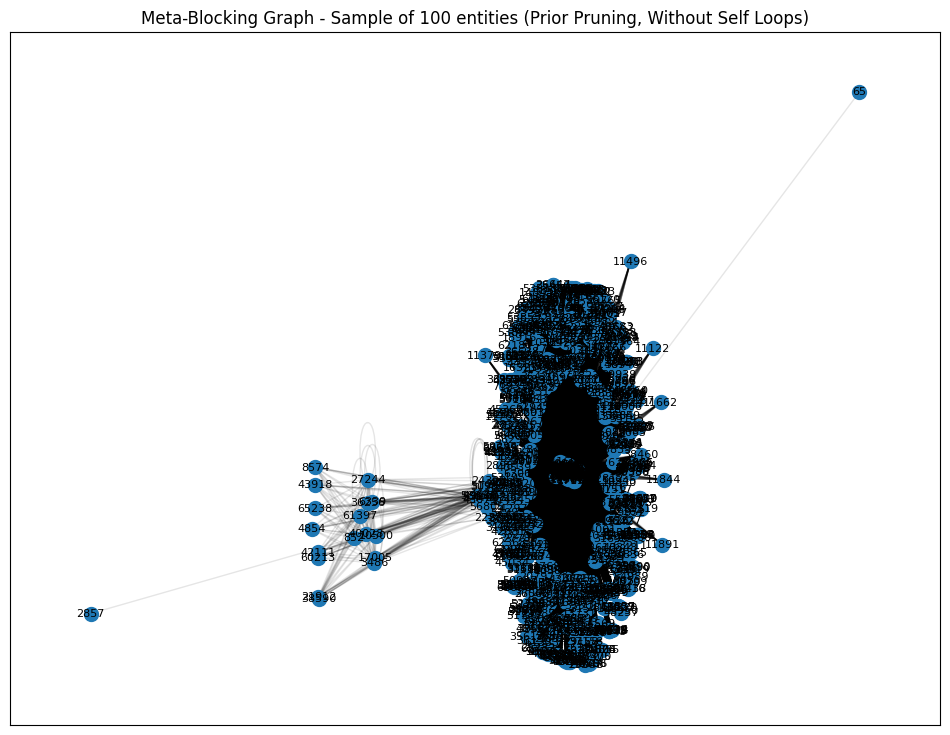

In [42]:
# Visualizing the graph with no self loops.
G_meta_blocking = nx.Graph()
for pair, weight in entity_pair_weights.items():
    if pair[0] != pair[1]:  # Exclude self-loops.
        G_meta_blocking.add_edge(pair.split(",")[0], pair.split(",")[1])

plt.figure(figsize=(12, 9))
pos_meta_blocking = nx.spring_layout(G_meta_blocking, seed=seed)  # Setting the seed here for reproductivity.
nx.draw_networkx_nodes(G_meta_blocking, pos_meta_blocking, node_size=100)
nx.draw_networkx_edges(G_meta_blocking, pos_meta_blocking, width=1.0, alpha=0.1) # Less opacity on the edges to be visible.
nx.draw_networkx_labels(G_meta_blocking, pos_meta_blocking, font_size=8, font_color="black")
plt.title("Meta-Blocking Graph - Sample of 100 entities (Prior Pruning, Without Self Loops)")
plt.show()

---
### Interpretation of the Meta-Blocking Graph
---

In the presented visualization, we observe a "Meta-Blocking Graph" that encapsulates a subset of 100 entities. Prior to the visualization, the graph underwent a pruning process, ensuring the elimination of self-loops. Within this graphical representation, individual nodes denote distinct entities. The connecting edges, on the other hand, symbolize the relationships or associations between these entities. These associations are delineated by the `entity_pair_weights` dictionary. To enhance clarity, especially in regions with overlapping edges, we opted for a reduced edge opacity.

---
### Sort the Entity Pair Dictionary
---

Addressing the subsequent segment of our discussion, we propose sorting the `entity_pair_weights` dictionary. This will enable us to prioritize and prominently display key pairs associated with higher weights, specifically those with values equating to 3 as their weight first. 

In [43]:
# Sort the dictionary - reversed to bigger weights be first.
entity_pair_weights_sorted = dict(sorted(entity_pair_weights.items(), key=lambda item: (-item[1], item[0])))

# Display the dictionary.
entity_pair_weights_sorted

{'10229,29089': 3,
 '10466,29089': 3,
 '10615,29089': 3,
 '10724,29089': 3,
 '10916,29089': 3,
 '11122,29089': 3,
 '11379,29089': 3,
 '11496,29089': 3,
 '11662,29089': 3,
 '11844,29089': 3,
 '11891,29089': 3,
 '12193,29089': 3,
 '12533,29089': 3,
 '12689,29089': 3,
 '13103,29089': 3,
 '13317,29089': 3,
 '13561,29089': 3,
 '13607,29089': 3,
 '13723,29089': 3,
 '13770,29089': 3,
 '13941,29089': 3,
 '14011,29089': 3,
 '14169,29089': 3,
 '14264,29089': 3,
 '14492,29089': 3,
 '14938,29089': 3,
 '15004,29089': 3,
 '15033,29089': 3,
 '15201,29089': 3,
 '15294,29089': 3,
 '15665,29089': 3,
 '15795,29089': 3,
 '15886,29089': 3,
 '1603,29089': 3,
 '16223,29089': 3,
 '16299,29089': 3,
 '16496,29089': 3,
 '16700,29089': 3,
 '17011,29089': 3,
 '17069,29089': 3,
 '17151,29089': 3,
 '17376,29089': 3,
 '17503,29089': 3,
 '17673,29089': 3,
 '17753,29089': 3,
 '17821,29089': 3,
 '18102,29089': 3,
 '18238,29089': 3,
 '18487,29089': 3,
 '18539,29089': 3,
 '18705,29089': 3,
 '18885,29089': 3,
 '18922,29089

---
### Graphical Representation Post-Pruning with the Reiteration of the Established Procedures
---

In accordance with the methodologies delineated above, we have undertaken a second iteration. The primary objective of this iteration is to further refine our dataset by eliminating entity pairs that possess a weight less than 2. This act of pruning ensures that we prioritize entity pairs of significant relevance.

Subsequent to our pruning process, we construct and visualize a graph devoid of self-loops. This graph, termed "Meta-Blocking Graph", represents a subset comprising **100 entities**. It's imperative to note that our visualization employs a `spring_layout`, ensuring reproducibility via a predetermined seed. 

The nodes, indicative of individual entities, are distinctly marked and labeled. For the sake of visual clarity, especially in regions of overlap, we've moderated the opacity of the connecting edges.

Let's plot the **_Meta-Blocking Graph - Sample of 100 entities (Post Pruning, Without Self Loops)_**!

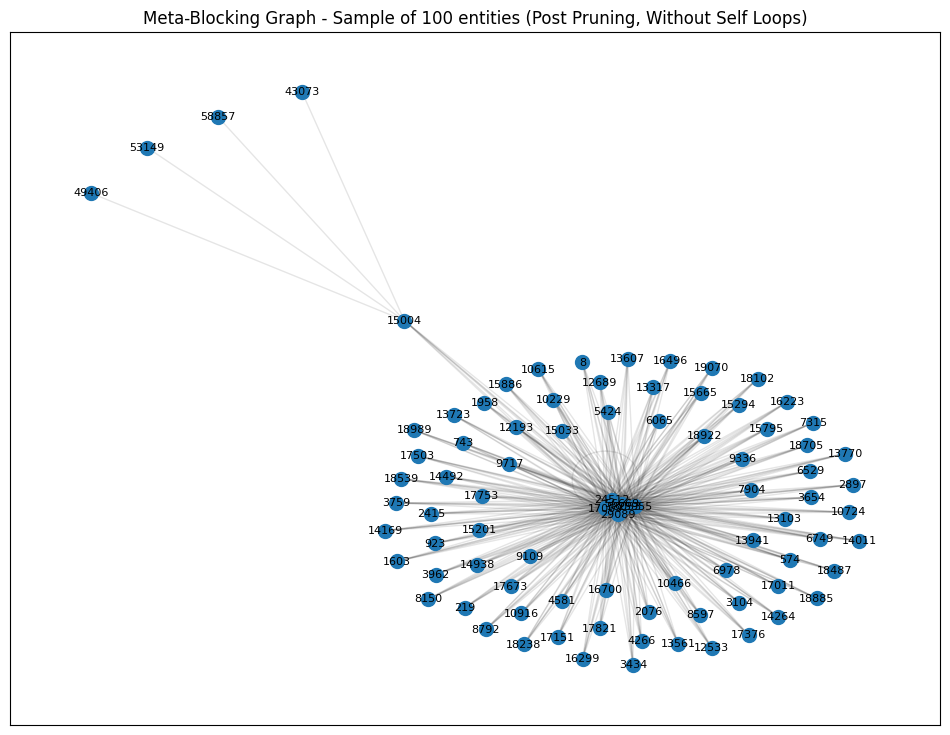

In [44]:
# Following the above presented procedures again.

# Filter out entity pairs with a weight less than 2.
pruned_entity_pair_weights = {key: value for key, value in entity_pair_weights.items() if value >= 2}

# Visualizing the graph with no self loops.
G_meta_blocking = nx.Graph()
for pair, weight in pruned_entity_pair_weights.items():
    if pair[0] != pair[1]:  # Exclude self-loops.
        G_meta_blocking.add_edge(pair.split(",")[0], pair.split(",")[1])

plt.figure(figsize=(12, 9))
pos_meta_blocking = nx.spring_layout(G_meta_blocking, seed=seed)  # Setting the seed here for reproductivity.
nx.draw_networkx_nodes(G_meta_blocking, pos_meta_blocking, node_size=100)
nx.draw_networkx_edges(G_meta_blocking, pos_meta_blocking, width=1.0, alpha=0.1) # Less opacity on the edges to be visible.
nx.draw_networkx_labels(G_meta_blocking, pos_meta_blocking, font_size=8, font_color="black")
plt.title("Meta-Blocking Graph - Sample of 100 entities (Post Pruning, Without Self Loops)")
plt.show()

---
### Inspection of Pruned Entity Pairs
---

Post visualization, we present a sorted dictionary of the pruned entity pairs. This dictionary, `pruned_entity_pair_weights_sorted`, arranges the entity pairs in descending order of their associated weights. Through this arrangement, we aim to facilitate a seamless and efficient inspection process, enabling the reader to discern patterns or anomalies with ease.

Moreover, through this procedure we aim to **validate that there are no pairs with weight less than 2** at the bottom of the dictionary.

In [45]:
# Sorted to validate only weights >=2 are remained on the pruned dictionary.
pruned_entity_pair_weights_sorted = dict(sorted(pruned_entity_pair_weights.items(), key=lambda item: (-item[1], item[0])))

# Display the dictionary for validating purposes.
pruned_entity_pair_weights_sorted

{'10229,29089': 3,
 '10466,29089': 3,
 '10615,29089': 3,
 '10724,29089': 3,
 '10916,29089': 3,
 '11122,29089': 3,
 '11379,29089': 3,
 '11496,29089': 3,
 '11662,29089': 3,
 '11844,29089': 3,
 '11891,29089': 3,
 '12193,29089': 3,
 '12533,29089': 3,
 '12689,29089': 3,
 '13103,29089': 3,
 '13317,29089': 3,
 '13561,29089': 3,
 '13607,29089': 3,
 '13723,29089': 3,
 '13770,29089': 3,
 '13941,29089': 3,
 '14011,29089': 3,
 '14169,29089': 3,
 '14264,29089': 3,
 '14492,29089': 3,
 '14938,29089': 3,
 '15004,29089': 3,
 '15033,29089': 3,
 '15201,29089': 3,
 '15294,29089': 3,
 '15665,29089': 3,
 '15795,29089': 3,
 '15886,29089': 3,
 '1603,29089': 3,
 '16223,29089': 3,
 '16299,29089': 3,
 '16496,29089': 3,
 '16700,29089': 3,
 '17011,29089': 3,
 '17069,29089': 3,
 '17151,29089': 3,
 '17376,29089': 3,
 '17503,29089': 3,
 '17673,29089': 3,
 '17753,29089': 3,
 '17821,29089': 3,
 '18102,29089': 3,
 '18238,29089': 3,
 '18487,29089': 3,
 '18539,29089': 3,
 '18705,29089': 3,
 '18885,29089': 3,
 '18922,29089

As you can see the above dictionary contains **only pairs with weight above 2**!

---
### Justification for sampling
---
While the above steps provide a structured approach to Task C, we acknowledge that the visualization is based on a sample, primarily due to time constraints and computational challenges. However, the sample serves as a representative snapshot, showcasing the relationships and shared blocks between entities. By focusing on a subset, we ensure that the visualization remains informative without being overwhelmed by the density and complexity of the full graph.

---
### Reflection on Task C Approach and Visualization
---

As mentioned above, our choice to rely on a sample, rather than the entirety of the dataset, was made with careful deliberation. The sample acts as a *representative snapshot*, adeptly illustrating the intricate **relationships** and **shared blocks** between entities. By concentrating our efforts on a subset, we aim to strike a balance – crafting a visualization that is informative yet unburdened by the potential density and complexity of the full graph.

However, it's crucial to acknowledge an inherent characteristic of sampling: **variability**. Despite our efforts to maintain consistency by inputting specific seeds, the resultant graphs display variations across different iterations. This variability underscores the dynamic nature of *sampling* and its susceptibility to fluctuations.

In light of this, for the purposes of documentation and formal representation, we have chosen to present one of our extracted images (*a pair of the two graphs prior and post pruning, from an execution of the current notebook*). This image, while being one among many potential outcomes, encapsulates the essence of our findings and serves as a testament to our **analytical approach presented as well on the documentation PDF file**.

In [46]:
from IPython.display import display, HTML

# Define the paths to the images.
image1_path = "G_meta_blocking_prior_pruning.png"
image2_path = "G_meta_blocking_after_pruning.png"

# Construct the HTML to display the images one above the other.
html_code = f"""
<div style="text-align: center;">
    <img src="{image1_path}" alt="Prior Pruning" style="width: 80%; margin-top: 2%; margin-bottom: 2%;">
    <img src="{image2_path}" alt="After Pruning" style="width: 80%; margin-top: 2%; margin-bottom: 2%;">
</div>
"""

# Display the images.
display(HTML(html_code))

---
### Visualization Insights
---

After a carefully look to both image and to the resulting dictionaries we can ensure **that only edges that have weight < 2** are kept after the pruning procedure. 

By comparing the 2 inputed images - since the other 2 will be different per execution due to sampling - we can highlight the following points: 

   * About **the 1/3 of the nodes have been removed** (intially there were 100, while after the pruning there are 69).
   * Most of the edges have been removed something clearly visually noticed since the second graph is way lese dense than the first one.
   * Nodes like the **65** and **2857** have been removed since their edges weight does not fulfill the prune criterion.
   * The **six nodes** in the middle of the cycle part of the graph maintain their spot to the post prune graph but lots of their edges where removed (the ones with weight equal to 1).
   * On the other hand nodes like the **49406**, **53149**, **58857**, and **43073** (on the top left part) may not having the highest betweenness in the graph but their edges - valideted through the dictionary print also - fulfill the given criterion. For more information you can see the documentation, but for example the node **49406** had lots of edges with weight 1 - see this depicted at the documentation - but only one edge with weight equal to 2 so kept after the prune. The previous mentioned edge connects the **49406** with the node **15004** - the one that can be noticed in the above graph (again check documentation for proofs).

---
### Conclusion
---

**Task C** embarked on the intricate journey of constructing a Meta-Blocking graph from the block collection established in **Task A**. By leveraging the CBS Weighting Scheme, we not only identified the commonalities between entities but also streamlined the comparison process through strategic pruning.

The results from **Task B** unveiled a whopping **2.6 billion** comparisons, underscoring the sheer volume and complexity of data we initially grappled with. Such a colossal number magnified the challenges inherent in the entity resolution process, highlighting the pressing need for further optimization.

Against this backdrop, **Task C** introduced a refined approach. The Meta-Blocking graph, by its very design, accentuated the relationships between entities based on their shared blocks. By assigning weights to these relationships using the CBS scheme, we were able to discern the strength and significance of each potential match.

However, the game-changer was the pruning strategy. By judiciously eliminating edges with a weight of less than 2, we not only reduced the computational burden but also honed in on the most promising entity pairs. This pruning not only streamlined the comparison process but also set the stage for enhanced accuracy in subsequent entity resolution steps.

Re-calculating the number of comparisons post-pruning, as done in **Task B**, provided a tangible metric of our efficiency gains. This re-evaluation, when juxtaposed with the initial 2.6 billion comparisons, served as a testament to the **effectiveness of the meta-blocking approach**. 

In essence, **Task C** built upon the foundation laid by **Task A** and the insights gleaned from **Task B**. By introducing advanced techniques like meta-blocking and pruning, we navigated the intricate landscape of entity resolution with increased finesse and efficiency. The task not only underscored the challenges of handling voluminous data but also showcased the transformative potential of innovative methodologies in ensuring data accuracy and integrity.

---
## Task D: Jaccard Similarity Function
---


In the final stage of the Token Blocking method, we delve into the intricate task of computing similarity scores between entity profiles. The primary objective here is to ascertain whether two entities can be deemed as identical based on their similarity scores. This would imply that the entities correspond to the same real-world object.


### Steps for Actual Comparison Calculations:

1. **Attribute Selection**: Decide upon the attributes that will serve as the foundation for the calculation of similarity between the two entity profiles. The selection of attributes is pivotal as it will influence the accuracy of the similarity score.
  
  
2. **Selecting an Appropriate Similarity Metric**: Depending on the nature of the attribute values, an appropriate similarity metric should be chosen:

   - **Strings**: Use measures like the Heinz distance.
   - **Sets**: Use measures like the Jaccard Similarity.
   - **Vectors**: Opt for the cosine similarity, etc.


3. **Structuring the Problem**: Before crafting the function to compute similarities, it's imperative to decide on its inputs. Will it be the entire dataset or distinct entities? Also, in what format will the data be provided? 


### Our Chosen Approach:

For this exercise, we are narrowing our focus to a subset of the initial dataset post-tokenization of each column/attribute. Here, each attribute manifests as a set of tokens. Rather than incorporating all attributes, we will base our similarity calculations on a singular attribute. The metric of choice will be the **Jaccard Similarity**.


#### Jaccard Similarity:

Given two sets, **A** and **B**, the Jaccard Similarity **J(A, B)** is computed as:


$$
J(A, B) = \frac{|A \cap B|}{|A \cup B|}
$$


Where $|A \cap B|$ represents the size of the intersection of the sets **A** and **B**, and $|A \cup B|$ is the size of the union of the sets.


#### Interpretation:

- If $ J(A, B) = 1$: This means $ A $ and $B$ are identical sets. Every element in $A$ is in $B$ and vice versa.
  
- If $J(A, B) = 0 $: This means $ A$ and $B$ have no common elements. Their intersection is empty.
  
- If $0 < J(A, B) < 1$: This means $A$ and $B$ share some elements but not all. The value of the Jaccard similarity indicates the fraction of shared elements relative to the total distinct elements in both sets.


**A Simple Example:**

Let's consider two sets:
$$A = \{1, 2, 3, 4\}$$
$$B = \{3, 4, 5, 6\}$$

The intersection is $A \cap B = \{3, 4\} $ and the union is $A \cup B = \{1, 2, 3, 4, 5, 6\}$.

Thus, the Jaccard Similarity is:
$$ J(A, B) = \frac{2}{6} = \frac{1}{3} $$

Let's first preview the dataset that was created at the Data Preprocessing phase, prior of Task A.

In [47]:
# Overview of the Task D's dataset.
data_taskD.head(10)

,id,authors,venue,year,title
0,1,"[qd, inc]","[san, diego]",[none],"[11578, sorrento, valley, road]"
1,2,"[as, argon, jg, hannoosh]","[phil., mag]",[none],"[initiation, of, crazes, in, polystyrene]"
2,3,"[gh, hansen, ll, wetterberg, h, sjã¶strã¶m, o,...","[the, histochemical, journal]",[1992],"[immunogold, labelling, is, a, quantitative, m..."
3,4,"[tm, hammett, p, harmon, w, rhodes]",[see],[none],"[the, burden, of, infectious, disease, among, ..."
4,5,"[jr, cogdell]","[new, directions, for, teaching, and, learning]",[1995],"[the, role, of, faculty, advising, in, science..."
5,6,"[wm, schmidt]",[to],[none],"[the, zero, multiplicity, of, linear, recurren..."
6,7,"[ra, haats]",[none],[2002],"[predicitve, validity, of, kindergarten, scree..."
7,8,"[jr, norris, j, deisenhofer]","[san, diego:, academic]",[none],"[the, photosynthetic, reaction, center]"
8,9,"[f, bennour]","[res., rep., ceria, u., paris]",[none],"[f., diene, aw, ndiaye, y., hachage, linã©aire..."
9,10,"[i, borg, jc, lingoes]",[none],[1987],"[multidimensional, similarity, structure, anal..."


The function below computes the Jaccard Similarity metric for two entities within a given dataset. By iterating through each attribute (excluding the 'id' column), it offers a detailed breakdown of similarities based on individual attributes.

To be more precise, our functions computes the Jaccard Similarity metric for two entities in a given dataset.

Parameters:
- entity_1 (int): Index of the first entity.
- entity_2 (int): Index of the second entity.
- data_frame (pd.DataFrame): The dataset containing the entities.

Returns:
- Prints the Jaccard Similarity for each attribute/column.

In [48]:
def compute_jaccard_similarity(entity_1, entity_2, data_frame):
    attributes_similarity = defaultdict(list)

    # Iterate over all columns except 'id'
    for column in data_frame.columns:
        if column != 'id':
            # Store attribute values for the two entities
            value_1 = data_frame[column].iloc[entity_1]
            value_2 = data_frame[column].iloc[entity_2]
            
            # Check for missing values
            if value_1 == "none" or value_2 == "none":
                print(f"For the attribute {column}, there are missing values; hence, Jaccard coefficient cannot be calculated.")
                continue

            # Compute Jaccard Similarity.
            intersection = len(set(value_1) & set(value_2))
            union = len(set(value_1) | set(value_2))
            jaccard_coefficient = intersection / union
            
            # Print the Jaccard coefficient.
            print(f"The Jaccard Similarity between entities {entity_1} and {entity_2} based on attribute {column} is: {jaccard_coefficient:.2f}")

---
### Using the Jaccard Similarity Function: A Simple Artificial Example
---

To better understand the application of the Jaccard Similarity function, let's consider a toy dataset.

First, we'll create the dataset and populate it with some artificial/dummy data.

Therefore, let's consider a dataset containing attributes about musical genres and instruments.

In [49]:
# Create another sample dataset.
sample_dataset2 = pd.DataFrame(columns=['id', 'genre', 'instrument'])
sample_dataset2['id'] = [1, 2]
sample_dataset2['genre'] = [['rock', 'pop','jazz'], ['jazz', 'blues', 'bachatta']]               # 1/5 = 0.2
sample_dataset2['instrument'] = [['guitar', 'drums', 'piano'], ['drums', 'saxophone', 'piano']]  # 2/4 = 0.5

# Using the function.
compute_jaccard_similarity(0, 1, sample_dataset2)

The Jaccard Similarity between entities 0 and 1 based on attribute genre is: 0.20
The Jaccard Similarity between entities 0 and 1 based on attribute instrument is: 0.50


In the above artificial example, we have a dataset containing musical genres and instruments for two entities. 

When we invoke the `compute_jaccard_similarity` function:

- For the `genre` attribute, there's just one shared genre (`jazz`) between the two entities. Given there are five unique genres in total, the Jaccard Similarity is $ \frac{1}{5} = 0.20 $.
  
- For the `instrument` attribute, both entities share `drums` and `piano`. With four unique instruments between the two entities, the Jaccard Similarity is $ \frac{2}{4} = 0.50 $.

This simple example illustrates how the function quantifies the similarity between entities based on shared attributes. The higher the Jaccard Similarity, the more similar the two entities are in the context of the specific attribute.

Having understood the workings of the Jaccard Similarity function through this illustration, we are now poised to implement it on our case study dataset, enabling us to gauge similarities between **random entities and entities that coincide inside the same blocks 3 times - see Task C** entities.

#### Random Entities

We will provide two examples of three random entities:

In [50]:
# An example of two random entities.
compute_jaccard_similarity(1, 2, data_taskD)

The Jaccard Similarity between entities 1 and 2 based on attribute authors is: 0.00
The Jaccard Similarity between entities 1 and 2 based on attribute venue is: 0.00
The Jaccard Similarity between entities 1 and 2 based on attribute year is: 0.00
The Jaccard Similarity between entities 1 and 2 based on attribute title is: 0.06


In [51]:
# An example of two random entities.
compute_jaccard_similarity(66877, 66878, data_taskD)

The Jaccard Similarity between entities 66877 and 66878 based on attribute authors is: 0.00
The Jaccard Similarity between entities 66877 and 66878 based on attribute venue is: 0.00
The Jaccard Similarity between entities 66877 and 66878 based on attribute year is: 0.00
The Jaccard Similarity between entities 66877 and 66878 based on attribute title is: 0.00


In [52]:
# An example of two random entities.
compute_jaccard_similarity(1565, 112, data_taskD) # Same year!

The Jaccard Similarity between entities 1565 and 112 based on attribute authors is: 0.00
The Jaccard Similarity between entities 1565 and 112 based on attribute venue is: 0.00
The Jaccard Similarity between entities 1565 and 112 based on attribute year is: 1.00
The Jaccard Similarity between entities 1565 and 112 based on attribute title is: 0.00


In [53]:
# Same attribute check that the functions outputs 1 for all fields and work right as it does!
compute_jaccard_similarity(1, 1, data_taskD) 

The Jaccard Similarity between entities 1 and 1 based on attribute authors is: 1.00
The Jaccard Similarity between entities 1 and 1 based on attribute venue is: 1.00
The Jaccard Similarity between entities 1 and 1 based on attribute year is: 1.00
The Jaccard Similarity between entities 1 and 1 based on attribute title is: 1.00


#### Entities that coincide inside the same blocks the most (3 times)

We will provide two examples of two entities that coincide inside the same blocks 3 times: 

In [57]:
# An example of two entities that coincide inside the same blocks 3 times.
compute_jaccard_similarity(1, 852, data_taskD)

The Jaccard Similarity between entities 1 and 852 based on attribute authors is: 0.00
The Jaccard Similarity between entities 1 and 852 based on attribute venue is: 0.00
The Jaccard Similarity between entities 1 and 852 based on attribute year is: 0.00
The Jaccard Similarity between entities 1 and 852 based on attribute title is: 0.00


In [55]:
# An example of two entities that coincide inside the same blocks 3 times.
compute_jaccard_similarity(352, 29089, data_taskD)

The Jaccard Similarity between entities 352 and 29089 based on attribute authors is: 0.00
The Jaccard Similarity between entities 352 and 29089 based on attribute venue is: 0.00
The Jaccard Similarity between entities 352 and 29089 based on attribute year is: 0.00
The Jaccard Similarity between entities 352 and 29089 based on attribute title is: 0.08


In [56]:
# An example of two entities that coincide inside the same blocks 3 times.
compute_jaccard_similarity(496, 29089, data_taskD)

The Jaccard Similarity between entities 496 and 29089 based on attribute authors is: 0.00
The Jaccard Similarity between entities 496 and 29089 based on attribute venue is: 0.00
The Jaccard Similarity between entities 496 and 29089 based on attribute year is: 0.00
The Jaccard Similarity between entities 496 and 29089 based on attribute title is: 0.00


---
### Conclusion
---

**Task D** delved deep into the intricacies of the **Jaccard Similarity** metric within the landscape of entity resolution. In our specific setup, entities' attribute values manifested as sets or lists of tokens. Such a structure naturally steered us towards the **Jaccard similarity**, a tool that effectively measures the similarity between sets, thereby aiding in determining if entities mirror the same real-world object.

The early examples served as an eye-opener, revealing that certain entity profiles, despite being juxtaposed for comparison, did not resonate in similarity. Some attributes, notably "year", posed challenges, predominantly due to their riddled missing values or easily to get matched, compelling us to exclude them from the similarity evaluations.

Moreover, a poignant observation surfaced when two entity profiles, already known to share a considerable number of blocks from **Task C**, were analyzed. Their **Jaccard similarity** did not corroborate them as identical entities. Such revelations hint towards a potential recalibration: within the context of this dataset, the **token block method** might be more efficacious with a stringent threshold. By amplifying this threshold, we stand a chance to prune candidate comparisons without eroding efficiency. The goal is to strike a balance, ensuring that in our pursuit to reduce comparisons, we don't inadvertently inflate false negatives - those elusive identical entity pairs that slip detection.

Navigating through Task D was akin to embarking on an enlightening journey, one that underscored the meticulous strategy requisite for adept entity resolution. Through a tapestry of theoretical exposition, hands-on examples, and astute observations, the task illuminated the core mechanics and applications of the **Jaccard Similarity metric**.

---
## Final Analysis Conclusions
---

The challenge of entity resolution stands prominently at the forefront of data integration endeavors. Ensuring data accuracy and functionality in a centralized data warehouse is non-negotiable, with entity resolution playing a pivotal role in achieving this feat. The ultimate aim remains clear-cut: a unified data repository where entities, along with their linked information, are uniquely identified and unambiguously represented.

**_Our Journey Through Numbers and Insights_**

- **Task A - Token Blocking:** Our expedition commenced with **Token Blocking**. Here, distinctive Blocking Keys (BKs) served as the backbone, facilitating the creation of cohesive blocks. This method, unbiased by schema, set the cornerstone for the subsequent meticulous entity resolution stages.


- **Task B - The Magnitude of Comparisons:** Transitioning to Task B, we were met with the enormity of the computational challenge ahead. A staggering **2,648,668,047 comparisons** were computed, underscoring the intricacies embedded in the task of duplicate detection.


- **Task C - Meta-Blocking, CBS Weighting, and Pruning:** Our next stride led us to the construction of the Meta-Blocking graph using the **CBS Weighting Scheme**. In our focused study on a subset of just 100 entities, aiming to discern the pairs from the overarching set of 66,879 entities (as unveiled in Task A), we noted an interesting outcome. From the billions of comparisons in Task B, the number dwindled to a mere **1127 final comparisons** in this subset study. Yet, a word of caution is in order. Our analysis, confined to a notably small sample size, might not reflect the exact numbers for the entire dataset (100 entries). Nevertheless, the substantial reduction in comparisons, even within this microcosm, cannot be overlooked. It attests to the potential efficiencies we can harness, ensuring a balance between thoroughness and computational feasibility.


- **Task D - Jaccard Similarity:** Our final task was emblematic of the entire process. We designed a custom function to gauge the **Jaccard Similarity** between entities, focusing specifically on the attribute "title". This measure, which quantifies the similarity between sets, exemplified the nuanced approach required for effective entity resolution.




**_Concluding Thoughts_**

As we wrap up our exploration into advanced techniques for entity resolution and duplicate detection, we stand enriched by our findings and experiences. We've traversed a landscape marked by complex methodologies, state-of-the-art techniques, and intricate challenges. The lessons imbibed, the insights garnered, and the methodologies explored will undoubtedly serve as guiding beacons in our future endeavors in the realm of data management. In our data-dominant era, entity resolution isn't merely a computational task; it's a commitment to upholding the sanctity and quality of data.

To be more precise, the process of **entity resolution** stands as an indispensable cornerstone in the vast landscape of data management. In every scenario, especially before the crucial step of data integration, this process emerges as both vital and computationally intensive. As we advance into an era dominated by colossal volumes of data, ensuring the integrity and quality of data warehouses becomes paramount. 

Throughout the evolution of data science, myriad methodologies have been pioneered to address this challenge. The overarching goal has always been twofold: First, to maximize **Efficiency** by accurately detecting genuine matches between entity profiles that correspond to identical real-world objects. Second, to optimize **Quality** by ensuring these matches are pinpointed with minimal computational overhead, thereby reducing the number of actual comparisons made.

Among the plethora of techniques at our disposal, the **Token Blocking method** shines brightly. This innovative approach not only serves the dual purpose of enhancing efficiency and quality but also strikes a harmonious balance between them. By judiciously reducing the computational burden while maintaining the accuracy of entity matches, Token Blocking exemplifies a nuanced strategy in the ever-evolving challenge of entity resolution.